# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Table of contents

1. [Часть 1. Предобработка данных](#pred)  
<br>
2. [Часть 2. Регрессия](#regr)  
  2.1 [Линейная регрессия + регуляризации](#linregr)  
  2.2 [Полиномиальная регрессия](#polregr)  
  2.3 [KNeighborsRegressor](#knregr)  
  2.4 [Radius Neighbors](#rnregr)  
  2.5 [DecisionTreeRegressor](#dtregr)  
<br>
3. [Часть 3. Классификация](#class)  
  3.1 [KNeighbors Classifier](#knclass)  
  3.2 [RadiusNeighbors Classifier](#rnclass)  
  3.3 [Logit Regression](#logregr)  
  3.4 [DecisionTree Classifier](#dtclass)  
<br>
4. [Часть 4. Многоклассовая классификация](#multclass)  
  4.1 [KNeighbors Classifier](#knmultclass)  
  4.2 [RadiusNeighbors Classifier](#rncmultlass)  
  4.3 [Logit Regression](#logmultregr)  
  4.4 [DecisionTree Classifier](#dtmultclass)  

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import numpy as np
import pandas as pd

# отображение в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

# более чёткое отображение графиков
%config InlineBackend.figure_format = 'svg' 

# увеличение дефолтного размера графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# замена шрифта на более приемлимый
font = {'family': 'Fira Sans', 'weight': 'light', 'style': 'italic', 'size': 11} 

# отключение предупреждений Anaconda
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных <a name="pred"></a>

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

***
**Comment:** *Предобработка данных, представленная ниже, включает замену ошибок, подсчёт дубликатов (на всякий случай), удаление признака `cheating` (так как он представлен в значительной части пустыми значениями) и заполнением некоторых пропущенных значений.*
***

In [6]:
data['sex'] = data['sex'].replace('m', 'M')
data['Pstatus'] = data['Pstatus'].replace('t', 'T')
data['Medu'] = data['Medu'].replace('o', '0')
data['Fedu'] = data['Fedu'].replace('o', '0')
data['Mjob'] = data['Mjob'].replace('at-home', 'at_home')
data['Fjob'] = data['Fjob'].replace('at-home', 'at_home')
data['guardian'] = data['guardian'].replace('futher', 'father')

In [7]:
data_d1 = data.drop(['ID', 'Subject', 'paid', 'cheating', 'G1', 'G2', 'G3'], axis=1)

index_list = data.index.tolist()
dd_list = data_d1[data_d1.duplicated(keep=False)].index.tolist()
dd_first_list = data_d1[data_d1.duplicated(keep='first')].index.tolist()

for i in range(len(dd_list)):
    index_list.remove(dd_list[i])

for i in range(len(index_list)):
    data_d1 = data_d1.drop(index_list[i])

for i in range(len(dd_first_list)):
    data_d2 = data_d1.drop(dd_first_list[i])
    index_list_1 = data_d2[data_d2.duplicated(keep=False)].index.tolist()
    unique_index = tuple(set(dd_list) - set(index_list_1))
    data.loc[unique_index[1],'ID'] = data.loc[unique_index[0]]['ID']

In [8]:
data.drop('cheating', axis='columns', inplace=True)

In [9]:
data.fillna({'famrel':0, 'Dalc':0, 'Walc':0}, inplace=True)
data['romantic'].fillna('minus', inplace = True)

***
**Comment:** *Преобразуем категориальные (или текстовые) данные в числа для эффективной работы предсказательных моделей в будущем.* <a name="prepdata"></a>
***

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label = LabelEncoder()

encoded_data = data.copy(deep=True)
encoders = {}

for col_name in encoded_data.columns[encoded_data.dtypes == 'object']:
    series = encoded_data[col_name]
    encoded_data[col_name] = pd.Series(
        label.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = dict(enumerate(label.classes_))

encoded_data_info = pd.DataFrame(encoders)
encoded_data_info.fillna(' ', inplace=True)
encoded_data_info.transpose()

,0,1,2,3,4
Subject,Math,Por,,,
school,GP,MS,,,
sex,F,M,,,
address,R,U,,,
famsize,GT3,LE3,,,
Pstatus,A,T,,,
Medu,0,1,2,3,4
Fedu,0,1,2,3,4
Mjob,at_home,health,other,services,teacher
Fjob,at_home,health,other,services,teacher


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

***
**Comment:** *Определим наиболее коррелирующие между собой признаки (как в положительной степени, так и в отрицательной), удалим наименее коррелирующие.*
***

In [13]:
data_corr = encoded_data.corr()
data_corr = data_corr.loc[['G1','G3'], [i for i in encoded_data.columns.tolist() if i not in ['G1','G3']]]
data_corr = data_corr.sort_values(by=['G3'], axis=1, ascending=False)

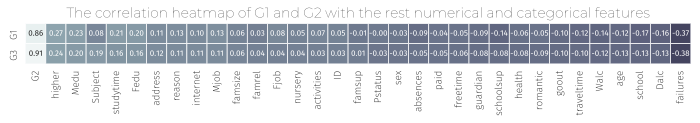

In [14]:
plt.figure(figsize=(12, 1))
sns.heatmap(data_corr, 
            cmap=sns.color_palette('bone', 1000),
            fmt='.2f',
            vmin=-1,
            center=0,
            annot=True,
            annot_kws={'family': 'Fira Sans', 'weight': 'regular', 'size': 8},
            cbar=False,
            square=True,
            linewidths=.75)

plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=10)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=10)
plt.title('The correlation heatmap of G1 and G2 with the rest numerical and categorical features',
          fontproperties='Montserrat',
          fontsize=14)
plt.show()

In [15]:
data_corr.abs().sort_values(by=['G3'], axis=1, ascending=False).iloc[:, 1:20]

,failures,higher,Medu,Subject,studytime,Fedu,Dalc,school,age,address,Walc,reason,internet,Mjob,traveltime,goout,romantic,health,schoolsup
G1,0.374175,0.271476,0.226101,0.079727,0.211314,0.195898,0.157772,0.169123,0.124121,0.113113,0.141794,0.125864,0.104772,0.13084,0.121053,0.101163,0.047299,0.060478,0.136877
G3,0.383145,0.236578,0.201472,0.187166,0.161629,0.159796,0.134622,0.127114,0.125282,0.117696,0.116715,0.108671,0.107064,0.10564,0.102627,0.097877,0.087705,0.080079,0.079346


In [16]:
colnames_to_delete = data_corr.abs().sort_values(by=['G3'], axis=1, ascending=False).iloc[:, 20:].columns.to_list()
colnames_to_delete.append('G2')

In [17]:
prep_data = data.drop(colnames_to_delete, axis=1)
prep_data

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,schoolsup,higher,internet,romantic,goout,Dalc,Walc,health,G1,G3
0,Por,GP,16,U,3,4,services,course,1,1,0,no,yes,yes,no,1,1.0,4.0,5,15,14
1,Por,GP,17,U,3,2,other,course,1,2,0,no,yes,yes,no,4,1.0,3.0,3,17,17
2,Por,GP,16,U,1,2,health,course,2,1,2,no,yes,yes,no,5,3.0,5.0,5,9,10
3,Por,MS,17,U,2,3,other,home,2,2,0,no,yes,yes,no,3,1.0,1.0,3,14,16
4,Por,GP,16,U,1,1,at_home,home,2,1,0,no,yes,no,minus,2,1.0,4.0,5,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Math,GP,15,R,3,3,services,reputation,2,3,2,no,yes,yes,yes,1,2.0,3.0,3,10,10
1040,Por,GP,15,R,2,1,health,reputation,1,2,0,no,yes,yes,yes,2,1.0,1.0,5,10,10
1041,Por,MS,16,R,1,1,at_home,course,3,2,0,no,yes,no,no,2,0.0,1.0,1,16,18
1042,Por,GP,16,U,2,1,at_home,course,4,1,0,no,yes,no,no,1,1.0,1.0,2,9,11


In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

***
**Comment:** *Для обеспечения хорошей работы моделей перекодируем категориальные признаки с помощью `OrdinalEncoder` и `OneHotEncoder`.*
***

In [19]:
object_columns = prep_data.columns[prep_data.dtypes == 'object']

_ordinal_encoder = [col for col in object_columns if len(prep_data[col].unique()) == 2]
_onehot_encoder = [col for col in object_columns if len(prep_data[col].unique()) > 2]

In [20]:
ordinal_encoder = OrdinalEncoder()
prep_data[_ordinal_encoder] = ordinal_encoder.fit_transform(prep_data[_ordinal_encoder])

In [21]:
_ct_form = lambda x: [(col, OneHotEncoder(sparse=False, categories='auto'), [col]) for col in x]

ct = ColumnTransformer(_ct_form(_onehot_encoder), remainder='drop')
ct.fit(prep_data)

ColumnTransformer(transformers=[('Medu', OneHotEncoder(sparse=False), ['Medu']),
                                ('Fedu', OneHotEncoder(sparse=False), ['Fedu']),
                                ('Mjob', OneHotEncoder(sparse=False), ['Mjob']),
                                ('reason', OneHotEncoder(sparse=False),
                                 ['reason']),
                                ('romantic', OneHotEncoder(sparse=False),
                                 ['romantic'])])

In [22]:
ct.get_feature_names()

['Medu__x0_0',
 'Medu__x0_1',
 'Medu__x0_2',
 'Medu__x0_3',
 'Medu__x0_4',
 'Fedu__x0_0',
 'Fedu__x0_1',
 'Fedu__x0_2',
 'Fedu__x0_3',
 'Fedu__x0_4',
 'Mjob__x0_at_home',
 'Mjob__x0_health',
 'Mjob__x0_other',
 'Mjob__x0_services',
 'Mjob__x0_teacher',
 'reason__x0_course',
 'reason__x0_home',
 'reason__x0_other',
 'reason__x0_reputation',
 'romantic__x0_minus',
 'romantic__x0_no',
 'romantic__x0_yes']

In [23]:
X = pd.DataFrame(ct.transform(prep_data),
                 columns=[x.replace('__x0', '') for x in ct.get_feature_names()])

result_val = prep_data[['G1', 'G3']]
prep_data.drop(_onehot_encoder + ['G1', 'G3'], axis=1, inplace=True)

_prep_data = pd.concat([prep_data, X, result_val], axis=1)
_prep_data

,Subject,school,age,address,traveltime,studytime,failures,schoolsup,higher,internet,goout,Dalc,Walc,health,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,romantic_minus,romantic_no,romantic_yes,G1,G3
0,1.0,0.0,16,1.0,1,1,0,0.0,1.0,1.0,1,1.0,4.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,14
1,1.0,0.0,17,1.0,1,2,0,0.0,1.0,1.0,4,1.0,3.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,17,17
2,1.0,0.0,16,1.0,2,1,2,0.0,1.0,1.0,5,3.0,5.0,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,10
3,1.0,1.0,17,1.0,2,2,0,0.0,1.0,1.0,3,1.0,1.0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,14,16
4,1.0,0.0,16,1.0,2,1,0,0.0,1.0,0.0,2,1.0,4.0,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,0.0,15,0.0,2,3,2,0.0,1.0,1.0,1,2.0,3.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,10
1040,1.0,0.0,15,0.0,1,2,0,0.0,1.0,1.0,2,1.0,1.0,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,10
1041,1.0,1.0,16,0.0,3,2,0,0.0,1.0,0.0,2,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16,18
1042,1.0,0.0,16,1.0,4,1,0,0.0,1.0,0.0,1,1.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,11


In [24]:
del prep_data, result_val

In [25]:
_prep_data.G3 = _prep_data.G3.astype('float64')

### ✅ Data standardization

In [26]:
from sklearn import preprocessing

In [27]:
_prep_data.iloc[:, :-1] = preprocessing.scale(_prep_data.iloc[:, :-1])
_prep_data

,Subject,school,age,address,traveltime,studytime,failures,schoolsup,higher,internet,goout,Dalc,Walc,health,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,romantic_minus,romantic_no,romantic_yes,G1,G3
0,0.780147,-0.593575,-0.585820,0.612776,-0.715074,-1.163502,-0.403106,-0.358676,0.305276,0.512244,-1.871604,-0.523835,1.331038,1.023086,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,-0.533041,1.913299,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,1.269766,14.0
1,0.780147,-0.593575,0.221035,0.612776,-0.715074,0.035606,-0.403106,-0.358676,0.305276,0.512244,0.732511,-0.523835,0.562027,-0.381387,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,1.940465,17.0
2,0.780147,-0.593575,-0.585820,0.612776,0.652210,-1.163502,2.646477,-0.358676,0.305276,0.512244,1.600550,1.646338,2.100049,1.023086,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,-0.742330,10.0
3,0.780147,1.684706,0.221035,0.612776,0.652210,0.035606,-0.403106,-0.358676,0.305276,0.512244,-0.135527,-0.523835,-0.975996,-0.381387,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.836855,1.745426,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,0.934417,16.0
4,0.780147,-0.593575,-0.585820,0.612776,0.652210,-1.163502,-0.403106,-0.358676,0.305276,-1.952194,-1.003566,-0.523835,1.331038,1.023086,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.836855,1.745426,-0.339683,-0.558174,10.168579,-1.321881,-0.740919,0.263718,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,-1.281810,-0.593575,-1.392674,-1.631918,0.652210,1.234713,2.646477,-0.358676,0.305276,0.512244,-1.871604,0.561252,0.562027,-0.381387,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,-0.836855,-0.572926,-0.339683,1.791557,-0.098342,-1.321881,1.349675,-0.406981,10.0
1040,0.780147,-0.593575,-1.392674,-1.631918,-0.715074,0.035606,-0.403106,-0.358676,0.305276,0.512244,-1.003566,-0.523835,-0.975996,1.023086,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,-0.836855,-0.572926,-0.339683,1.791557,-0.098342,-1.321881,1.349675,-0.406981,10.0
1041,0.780147,1.684706,-0.585820,-1.631918,2.019494,0.035606,-0.403106,-0.358676,0.305276,-1.952194,-1.003566,-1.608922,-0.975996,-1.785861,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,1.605116,18.0
1042,0.780147,-0.593575,-0.585820,0.612776,3.386778,-1.163502,-0.403106,-0.358676,0.305276,-1.952194,-1.871604,-0.523835,-0.975996,-1.083624,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,-0.742330,11.0


In [28]:
_prep_data.mean(axis=0).round(3)

Subject             -0.000 
school               0.000 
age                  0.000 
address             -0.000 
traveltime          -0.000 
studytime            0.000 
failures            -0.000 
schoolsup           -0.000 
higher               0.000 
internet            -0.000 
goout                0.000 
Dalc                -0.000 
Walc                -0.000 
health               0.000 
Medu_0               0.000 
Medu_1               0.000 
Medu_2              -0.000 
Medu_3              -0.000 
Medu_4               0.000 
Fedu_0               0.000 
Fedu_1              -0.000 
Fedu_2              -0.000 
Fedu_3               0.000 
Fedu_4               0.000 
Mjob_at_home         0.000 
Mjob_health         -0.000 
Mjob_other          -0.000 
Mjob_services       -0.000 
Mjob_teacher        -0.000 
reason_course        0.000 
reason_home         -0.000 
reason_other         0.000 
reason_reputation    0.000 
romantic_minus       0.000 
romantic_no         -0.000 
romantic_yes        

In [29]:
_prep_data.std(axis=0).round(3)

Subject              1.000
school               1.000
age                  1.000
address              1.000
traveltime           1.000
studytime            1.000
failures             1.000
schoolsup            1.000
higher               1.000
internet             1.000
goout                1.000
Dalc                 1.000
Walc                 1.000
health               1.000
Medu_0               1.000
Medu_1               1.000
Medu_2               1.000
Medu_3               1.000
Medu_4               1.000
Fedu_0               1.000
Fedu_1               1.000
Fedu_2               1.000
Fedu_3               1.000
Fedu_4               1.000
Mjob_at_home         1.000
Mjob_health          1.000
Mjob_other           1.000
Mjob_services        1.000
Mjob_teacher         1.000
reason_course        1.000
reason_home          1.000
reason_other         1.000
reason_reputation    1.000
romantic_minus       1.000
romantic_no          1.000
romantic_yes         1.000
G1                   1.000
G

### Metrics

In [30]:
from sklearn import metrics

In [31]:
def calc_metrics(correct, predicted):
    
    mse = metrics.mean_squared_error(correct, predicted)
    rmse = np.sqrt(mse)
    R2 = metrics.r2_score(correct, predicted)
    mae = metrics.mean_absolute_error(correct, predicted)
    medae = metrics.median_absolute_error(correct, predicted)

    return mse, rmse, R2, mae, medae

## Часть 2. Регрессия <a name="regr"></a>

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
(trainData,
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(_prep_data.drop(['G3'], axis=1),
                                            _prep_data['G3'],
                                            test_size=0.3,
                                            random_state=5)

In [34]:
X1 = _prep_data.drop(['G3'], axis=1)
y1 = _prep_data['G3']

In [35]:
X2 = _prep_data.drop(['G1', 'G3'], axis=1)
y2 = _prep_data['G3']

In [36]:
from sklearn.model_selection import KFold

In [37]:
kf = KFold(n_splits=5, shuffle=True)

***
**Comment:** *Фрейм для записи результатов кросс-валидации.*
***

In [38]:
_result_df = pd.DataFrame(columns=['Model', 'Parameters', 'Metric', 'Score', 'Predicted percentage'])
_result_df

,Model,Parameters,Metric,Score,Predicted percentage


In [39]:
def df_extension(model, dct, df):
    
    def add(perc):
        for key, value in dct.items():
            for i in range(len(min_regr_loss)):
                if value[i] == min_regr_loss[i]:
                    df.loc[len(df)] = [model, key, metrics[i], value[i], perc]
        return df
    
    metrics = ['MSE', 'RMSE', 'R2', 'MAE', 'MedAE']
    d_array = np.array(list(dct.values()))
    min_regr_loss = np.amin(d_array, axis=0)
    scores_list = []
    
    if len(min_regr_loss) > 5:
        max_perc = np.amax(d_array[:, -1], axis=0)
        h_values = [d_array[i[0], 3] for i in np.argwhere(d_array[:, -1] == max_perc).tolist()]
        min_regr_loss = min_regr_loss[:-1]
        
        for key, value in dct.items():
            if value[-1] == max_perc and value[3] == min(h_values):
                    df.loc[len(df)] = [model, key, metrics[3], value[3], max_perc]
        
    add(' ')
         
    return df

### 📈 Линейная регрессия + регуляризации <a name="linregr"></a>

In [40]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [41]:
_linregr_Model = linear_model.LinearRegression()
_linregr_Model.fit(trainData, trainDependentVariables)

LinearRegression()

In [42]:
_linregr_Model_preds = _linregr_Model.predict(testData)

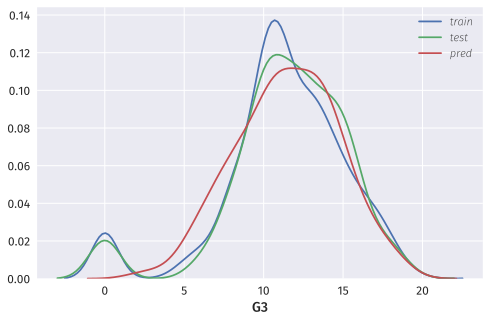

In [43]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(_linregr_Model_preds, bins=100, hist=False, label='pred')

plt.xticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)

plt.xlabel('G3', fontproperties='Fira Sans', fontweight='medium', fontsize=14)
plt.legend(prop=font)

plt.show()

In [44]:
print(
    'MSE: {} \
    \nRMSE: {} \
    \nR2: {} \
    \nMAE: {} \
    \nMedAE: {}'.format(
        *calc_metrics(testDependentVariables, _linregr_Model_preds)
    )
)

MSE: 4.818707587250268     
RMSE: 2.195155481338456     
R2: 0.6666021351874141     
MAE: 1.4335158737307772     
MedAE: 1.03955078125


### Гребневая регрессия

In [45]:
def ridge_reg(X_train, y_train, X_test):
    
    _ridge_ModelCV = linear_model.RidgeCV(alphas=np.arange(0, 40, 0.01), cv=kf, scoring='neg_mean_squared_error')
    _ridge_ModelCV.fit(X_train, y_train)
    
    _lasso_ModelCV_preds = _ridge_ModelCV.predict(X_test)
    
    return [_ridge_ModelCV.alpha_, _lasso_ModelCV_preds]

In [46]:
ridge_G1 = ridge_reg(trainData, trainDependentVariables, testData)
_result_df.loc[len(_result_df)] = ['RidgeCV_G1', 'alpha = {}'.format(ridge_G1[0]), 'MAE',
                                   [*calc_metrics(testDependentVariables, ridge_G1[1])][3], ' ']

ridge_wG1 = ridge_reg(trainData.drop(['G1'], axis=1), trainDependentVariables, testData.drop(['G1'], axis=1))
_result_df.loc[len(_result_df)] = ['RidgeCV_wG1', 'alpha = {}'.format(ridge_wG1[0]), 'MAE',
                                   [*calc_metrics(testDependentVariables, ridge_wG1[1])][3], ' ']

_result_df

,Model,Parameters,Metric,Score,Predicted percentage
0,RidgeCV_G1,alpha = 22.81,MAE,1.396613,
1,RidgeCV_wG1,alpha = 39.99,MAE,2.349331,


In [47]:
_ridge_Model = linear_model.Ridge(alpha=10.73)
_ridge_Model.fit(trainData, trainDependentVariables)

Ridge(alpha=10.73)

In [48]:
_ridge_Model_preds = _ridge_Model.predict(testData)

In [49]:
coefs = pd.Series(_ridge_Model.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1                   2.906972
Subject              0.501489
failures            -0.302778
romantic_no          0.144539
address              0.137447
age                  0.135693
Mjob_teacher        -0.135086
health              -0.125657
romantic_yes        -0.121685
romantic_minus      -0.116409
Medu_4               0.115211
schoolsup            0.114628
goout               -0.092627
internet             0.088878
Fedu_0               0.063848
Medu_2              -0.063361
studytime           -0.056703
Medu_3              -0.055679
traveltime          -0.051832
Dalc                 0.050234
reason_other        -0.047414
Mjob_health          0.044953
reason_reputation    0.043255
reason_home         -0.043216
Fedu_2              -0.041735
Fedu_3               0.039652
Fedu_4              -0.039500
Mjob_services        0.031643
Fedu_1               0.030593
reason_course        0.029811
Mjob_other           0.027699
Medu_0               0.024926
higher               0.020556
Mjob_at_ho

In [50]:
coefs = []
for alpha in np.arange(0.1, 100, 0.1):
    
    _ridge_Model = linear_model.Ridge(alpha=alpha).fit(trainData, trainDependentVariables)
    coefs.append(abs(_ridge_Model.coef_))

coefs = pd.DataFrame(coefs, columns=trainData.columns)

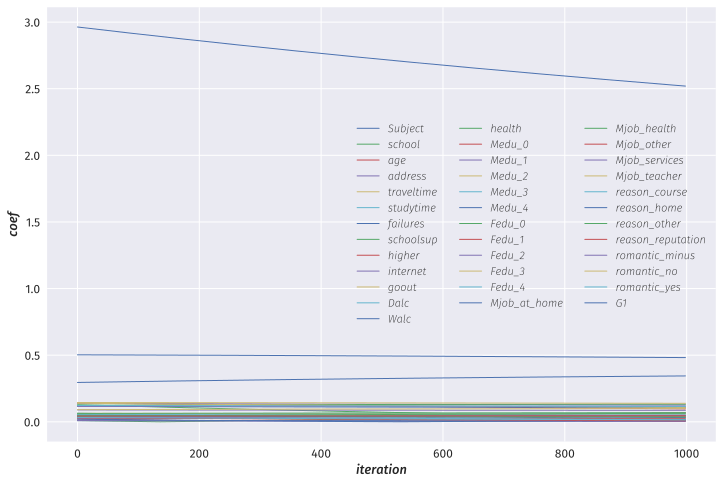

In [51]:
coefs.plot(linewidth=1, figsize=(12, 8))

plt.xticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)

plt.xlabel('iteration', fontproperties='Fira Sans', fontweight='medium', fontstyle='italic', fontsize=13)
plt.ylabel('coef', fontproperties='Fira Sans', fontweight='medium', fontstyle='italic', fontsize=13)
plt.legend(prop=font, ncol=3)

plt.show()

***
**Comment:** *Лучшие результаты по метрике `mean_squared_error` (у меня в записи таблицы опечатка, вместе MAE д.б. MSE) Гребневая регрессия продемонстрировала с alpha=13.07 (с G1), alpha=39.99 (без G1). Использовала alpha=10.73 для коэффициентов ради интереса, потому что в предыдущей попытке, на кросс-валидации оптимальное альфа было именно таким.*
***

### Лассо регрессия

In [52]:
def lasso_reg(X_train, y_train, X_test):
    
    _lasso_ModelCV = linear_model.LassoCV(alphas=np.arange(0, 50, 0.01), cv=kf)
    _lasso_ModelCV.fit(X_train, y_train)
    
    _lasso_ModelCV_preds = _lasso_ModelCV.predict(X_test)
    
    return [_lasso_ModelCV.alpha_, _lasso_ModelCV_preds]

In [53]:
lasso_G1 = lasso_reg(trainData, trainDependentVariables, testData)
_result_df.loc[len(_result_df)] = ['LassoCV_G1', 'alpha = {}'.format(lasso_G1[0]), 'MAE',
                                   [*calc_metrics(testDependentVariables, lasso_G1[1])][3], ' ']

lasso_wG1 = lasso_reg(trainData.drop(['G1'], axis=1), trainDependentVariables, testData.drop(['G1'], axis=1))
_result_df.loc[len(_result_df)] = ['LassoCV_wG1', 'alpha = {}'.format(lasso_wG1[0]), 'MAE',
                                   [*calc_metrics(testDependentVariables, lasso_wG1[1])][3], ' ']

_result_df

,Model,Parameters,Metric,Score,Predicted percentage
0,RidgeCV_G1,alpha = 22.81,MAE,1.396613,
1,RidgeCV_wG1,alpha = 39.99,MAE,2.349331,
2,LassoCV_G1,alpha = 0.13,MAE,1.377540,
3,LassoCV_wG1,alpha = 0.07,MAE,2.329029,


In [54]:
_lasso_Model = linear_model.Lasso(alpha=0.08)
_lasso_Model.fit(trainData, trainDependentVariables)

Lasso(alpha=0.08)

In [55]:
_lasso_Model_preds = _ridge_Model.predict(testData)

In [56]:
coefs = pd.Series(_lasso_Model.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1                   2.923765
Subject              0.407945
failures            -0.206988
romantic_no          0.160407
address              0.082403
health              -0.062847
Fedu_2              -0.015268
internet             0.015038
schoolsup            0.011990
romantic_minus      -0.004974
Medu_4               0.003612
Fedu_0               0.001153
Mjob_health          0.000000
Dalc                -0.000000
school              -0.000000
age                  0.000000
reason_reputation    0.000000
traveltime          -0.000000
studytime           -0.000000
reason_other        -0.000000
reason_home         -0.000000
higher               0.000000
reason_course        0.000000
goout               -0.000000
Walc                -0.000000
Mjob_at_home        -0.000000
Mjob_teacher        -0.000000
Medu_0               0.000000
Medu_1               0.000000
Medu_2              -0.000000
Mjob_services        0.000000
romantic_yes        -0.000000
Fedu_1               0.000000
Mjob_other

In [57]:
coefs = []

for alpha in np.arange(0, 3.3, 0.1):
    
    _lasso_Model = linear_model.Lasso(alpha=alpha).fit(trainData, trainDependentVariables)
    coefs.append(abs(_lasso_Model.coef_))

coefs = pd.DataFrame(coefs, columns=trainData.columns)

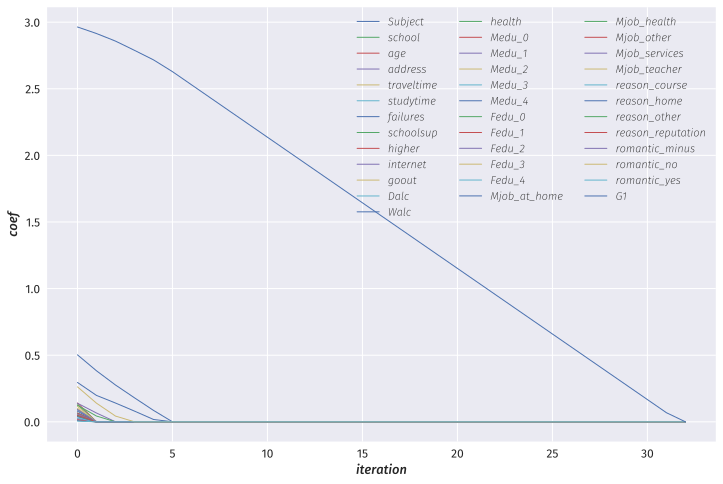

In [58]:
coefs.plot(linewidth=1, figsize=(12, 8))

plt.xticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)

plt.xlabel('iteration', fontproperties='Fira Sans', fontweight='medium', fontstyle='italic', fontsize=13)
plt.ylabel('coef', fontproperties='Fira Sans', fontweight='medium', fontstyle='italic', fontsize=13)
plt.legend(prop=font, ncol=3)

plt.show()

***
**Comment:** *Лучшие результаты по метрике **`mean_absolute_error`** Лассо-регрессия продемонстрировала с alpha=0.12 (с G1), alpha=0.07 (без G1). Использовала alpha=0.08 для коэффициентов ради интереса, потому что в предыдущей попытке, на кросс-валидации оптимальное альфа было именно таким.*
***

### 💡 Полиномиальная регрессия <a name="polregr"></a>

In [59]:
from sklearn.preprocessing import PolynomialFeatures

#### Линейная регрессия

In [60]:
poly = PolynomialFeatures(degree=1)
poly.fit(trainData)

PolynomialFeatures(degree=1)

In [61]:
poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

In [62]:
print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 37
Number of features after polynomial transformation: 38


In [63]:
_regression_Model = linear_model.Ridge(alpha=10.73)
_regression_Model.fit(poly_train, trainDependentVariables)

Ridge(alpha=10.73)

In [64]:
print(
    'MSE: {} \
    \nRMSE: {} \
    \nR2: {} \
    \nMAE: {} \
    \nMedAE: {}'.format(
        *calc_metrics(testDependentVariables, _regression_Model.predict(poly_test))
    )
)

MSE: 4.707670729027594     
RMSE: 2.169716739352765     
R2: 0.674284579240439     
MAE: 1.4055423385303691     
MedAE: 0.9792014653098748


In [65]:
poly = PolynomialFeatures(degree=2)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 37
Number of features after polynomial transformation: 741


In [66]:
_regression_Model = linear_model.Ridge(alpha=10.73)
_regression_Model.fit(poly_train, trainDependentVariables)

Ridge(alpha=10.73)

In [67]:
print(
    'MSE: {} \
    \nRMSE: {} \
    \nR2: {} \
    \nMAE: {} \
    \nMedAE: {}'.format(
        *calc_metrics(testDependentVariables, _regression_Model.predict(poly_test))
    )
)

MSE: 10.414213960700824     
RMSE: 3.2271061278955213     
R2: 0.2794589347181424     
MAE: 2.453685250464092     
MedAE: 1.99142594130163


In [68]:
poly = PolynomialFeatures(degree=4)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 37
Number of features after polynomial transformation: 101270


In [69]:
_regression_Model = linear_model.Ridge(alpha=10.73)
_regression_Model.fit(poly_train, trainDependentVariables)

Ridge(alpha=10.73)

In [70]:
print(
    'MSE: {} \
    \nRMSE: {} \
    \nR2: {} \
    \nMAE: {} \
    \nMedAE: {}'.format(
        *calc_metrics(testDependentVariables, _regression_Model.predict(poly_test))
    )
)

MSE: 8.101052381022475     
RMSE: 2.8462347726465707     
R2: 0.4395024977830153     
MAE: 2.0068883118611134     
MedAE: 1.4413843210181803


***
**Comment:** *Методом проб и ошибок удалось установить, что оптимальное кол-во полиномов - 4. Точность по **MAE** Гребневой регрессии заметно улучшилась.*
***

### 👽 KNeighborsRegressor <a name="knregr"></a>

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
def cv_evaluation_KNN(X, y):

    metrics_list = ['euclidean', 'manhattan', 'chebyshev']
    _knr_Model_res = {}

    for metric in metrics_list:
        for k in range(1, 51):
    
            regr_loss = []
    
            _knr_Model = KNeighborsRegressor(n_neighbors=k, metric=metric, p=1)
        
            for train_index, test_index in kf.split(X):

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]
        
                _knr_Model_fit = _knr_Model.fit(X_train, y_train)
                predictedDependentVariables = _knr_Model_fit.predict(X_test)
    
                regr_loss.append([*calc_metrics(y_test, predictedDependentVariables)])
    
            _knr_Model_res['k = {}, metric = {}'.format(k, metric)] = list(np.mean(regr_loss, axis=0))
    
    return _knr_Model_res

In [73]:
_result_df.loc[len(_result_df)] = [' '] * _result_df.shape[1]
df_extension('KNeighborsRegressor_G1', cv_evaluation_KNN(X1, y1), _result_df)

_result_df.loc[len(_result_df)] = [' '] * _result_df.shape[1]
df_extension('KNeighborsRegressor_wG1', cv_evaluation_KNN(X2, y2), _result_df)

,Model,Parameters,Metric,Score,Predicted percentage
0,RidgeCV_G1,alpha = 22.81,MAE,1.39661,
1,RidgeCV_wG1,alpha = 39.99,MAE,2.34933,
2,LassoCV_G1,alpha = 0.13,MAE,1.37754,
3,LassoCV_wG1,alpha = 0.07,MAE,2.32903,
4,,,,,
5,KNeighborsRegressor_G1,"k = 27, metric = euclidean",MSE,9.86716,
6,KNeighborsRegressor_G1,"k = 27, metric = euclidean",RMSE,3.13579,
7,KNeighborsRegressor_G1,"k = 32, metric = euclidean",MedAE,1.42188,
8,KNeighborsRegressor_G1,"k = 33, metric = euclidean",MAE,2.15052,
9,KNeighborsRegressor_G1,"k = 1, metric = manhattan",R2,-0.25167,


In [74]:
# def _get_index(m):
#     return list(map(lambda x: np.where(vvv == m[x])[0][0], range(len(m))))

***
**Comment:** *В таблице представлены минимальные значения ошибок **KNN** с разными гиперпараметрами (подобраны на кросс-валидации). Видим, что модель лучше сработала с G1.*
***

### 🪐 Radius Neighbors <a name="rnregr"></a>

***
**Comment:** *Чтобы определиться с диапазоном значений радиуса, я посчитала матрицу расстояний для нашего датафрейма и вывела некоторые статистические данные.*
***

In [75]:
from scipy.spatial.distance import pdist, squareform

In [76]:
distances = pdist(trainData.values, metric='euclidean')
dist_matrix = squareform(distances)

In [77]:
print('Some descriptive statistics of the distance matrix: \n\
      \n\tMin: {} \
      \n\tMax: {} \
      \n\tMean: {} \
      \n\tMedian: {} \
      \n\t25% Quartile: {} \
      \n\t75% Quartile: {}'.format(np.amin(dist_matrix),
                             np.amax(dist_matrix),
                             np.mean(dist_matrix),
                             np.median(dist_matrix),
                             np.percentile(dist_matrix, 25),
                             np.percentile(dist_matrix, 75)))

Some descriptive statistics of the distance matrix: 
      
	Min: 0.0       
	Max: 18.340012842292786       
	Mean: 8.405952008113754       
	Median: 8.280782298620835       
	25% Quartile: 7.462586732606919       
	75% Quartile: 9.102513701873768


In [78]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [79]:
def cv_evaluation_RNR(X, y):
    
    metrics_list = ['euclidean', 'manhattan', 'chebyshev']
    _rnr_Model_res = {}
    
    for metric in metrics_list:
        for r in np.arange(7, 10, 0.2):

            regr_loss = []
    
            _rnr_Model = RadiusNeighborsRegressor(radius=r, metric=metric, p=1)
    
            for train_index, test_index in kf.split(X):

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]
        
                _rnr_Model_fit = _rnr_Model.fit(X_train, y_train)
                predictedDependentVariables = _rnr_Model_fit.predict(X_test)
                is_nan = np.isnan(predictedDependentVariables)
            
                predictedDependentVariables[is_nan] = np.mean(predictedDependentVariables[~is_nan])

                regr_loss.append([*calc_metrics(y_test, predictedDependentVariables),
                                 (len(predictedDependentVariables[~is_nan]) / len(predictedDependentVariables))*100])
            
            _rnr_Model_res['r = {:.2f}, metric = {}'.format(r, metric)] = list(np.mean(regr_loss, axis=0))

    return _rnr_Model_res

In [80]:
_result_df.loc[len(_result_df)] = [' '] * _result_df.shape[1]
df_extension('RadiusNeighborsRegressor_G1', cv_evaluation_RNR(X1, y1), _result_df)

_result_df.loc[len(_result_df)] = [' '] * _result_df.shape[1]
df_extension('RadiusNeighborsRegressor_wG1', cv_evaluation_RNR(X2, y2), _result_df)

,Model,Parameters,Metric,Score,Predicted percentage
0,RidgeCV_G1,alpha = 22.81,MAE,1.39661,
1,RidgeCV_wG1,alpha = 39.99,MAE,2.34933,
2,LassoCV_G1,alpha = 0.13,MAE,1.37754,
3,LassoCV_wG1,alpha = 0.07,MAE,2.32903,
4,,,,,
5,KNeighborsRegressor_G1,"k = 27, metric = euclidean",MSE,9.86716,
6,KNeighborsRegressor_G1,"k = 27, metric = euclidean",RMSE,3.13579,
7,KNeighborsRegressor_G1,"k = 32, metric = euclidean",MedAE,1.42188,
8,KNeighborsRegressor_G1,"k = 33, metric = euclidean",MAE,2.15052,
9,KNeighborsRegressor_G1,"k = 1, metric = manhattan",R2,-0.25167,


***
**Comment:** *В таблице представлены минимальные значения ошибок **RNR** с разными гиперпараметрами (подобраны на кросс-валидации). Видим, что модель лучше сработала с G1.*
***

### 🌲 DecisionTree Regressor <a name="dtregr"></a>

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
_dtr_Model = DecisionTreeRegressor()

params = {'criterion': ['mse', 'friedman_mse', 'mae'],
          'max_depth': np.arange(1, 50, 1),
          'max_features': ['auto', 'sqrt', 'log2']}

In [83]:
def dtr_hyp_search(name, data, features):
    
    scoring = [['neg_mean_squared_error', 'MSE'],
               ['r2', 'R2'], ['neg_mean_absolute_error', 'MAE'],
               ['neg_median_absolute_error', 'MedAE']]

    for score in scoring:
        
        _rg_Search_DTC = GridSearchCV(_dtr_Model, params, cv=kf, scoring=score[0])
        _rg_Search_DTC.fit(data, features)
        
        res = _rg_Search_DTC.best_params_
        res = list(res.items())
        
        _result_df.loc[len(_result_df)] = [name, '{} {} {}'.format(*res),
                                           score[1], '{:.5f}'.format(_rg_Search_DTC.best_score_), ' ']

In [84]:
dtr_hyp_search('DecisionTreeRegressor_G1', X1, y1)
dtr_hyp_search('DecisionTreeRegressor_wG1', X2, y2)

In [85]:
_result_df

,Model,Parameters,Metric,Score,Predicted percentage
0,RidgeCV_G1,alpha = 22.81,MAE,1.39661,
1,RidgeCV_wG1,alpha = 39.99,MAE,2.34933,
2,LassoCV_G1,alpha = 0.13,MAE,1.37754,
3,LassoCV_wG1,alpha = 0.07,MAE,2.32903,
4,,,,,
5,KNeighborsRegressor_G1,"k = 27, metric = euclidean",MSE,9.86716,
6,KNeighborsRegressor_G1,"k = 27, metric = euclidean",RMSE,3.13579,
7,KNeighborsRegressor_G1,"k = 32, metric = euclidean",MedAE,1.42188,
8,KNeighborsRegressor_G1,"k = 33, metric = euclidean",MAE,2.15052,
9,KNeighborsRegressor_G1,"k = 1, metric = manhattan",R2,-0.25167,


***
**Comment:** *В таблице представлены минимальные значения ошибок **DTS** с разными гиперпараметрами (подобраны на кросс-валидации с помощью **`GridSearch`**). Видим, что модель лучше сработала с G1.*

<br>*Все регрессионные модели **лучше сработали** (исходя из полученных значений метрик), когда присутствовала оценка за первое полугодие в тренировочном и тестовом наборе данных. Можно сделать вывод о том, что итоговая оценка имеет сильную связь с промежуточной.*
***

## Часть 3. Классификация <a name="class"></a>

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


In [86]:
from sklearn.metrics import roc_curve, plot_confusion_matrix

In [87]:
def model_evaluation(y_test, y_preds, X_test, search_mod, cmap):

    print('Accuracy: {:.7f}\nBalanced accuracy: {:.7f}\n'.format(metrics.accuracy_score(y_test, y_preds),
                                                                 metrics.balanced_accuracy_score(y_test, y_preds)))

    print(metrics.classification_report(y_test, y_preds))

    style.use('seaborn-darkgrid')
    sns.set_style('dark')

    plot_confusion_matrix(search_mod,
                          X_test,
                          y_test,
                          cmap=cmap,
                          values_format='.5g')
    plt.show()

***
**Comment:** *Формируем новый признак: сдал студент предмет или нет.*
***

In [88]:
_prep_data = _prep_data.assign(G3_b=_prep_data.G3)
_prep_data['G3_b'] = _prep_data['G3_b'].replace(np.arange(21.0).tolist(),
                                                np.zeros(8).tolist() + np.ones(13).tolist())
_prep_data

,Subject,school,age,address,traveltime,studytime,failures,schoolsup,higher,internet,goout,Dalc,Walc,health,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,romantic_minus,romantic_no,romantic_yes,G1,G3,G3_b
0,0.780147,-0.593575,-0.585820,0.612776,-0.715074,-1.163502,-0.403106,-0.358676,0.305276,0.512244,-1.871604,-0.523835,1.331038,1.023086,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,-0.533041,1.913299,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,1.269766,14.0,1.0
1,0.780147,-0.593575,0.221035,0.612776,-0.715074,0.035606,-0.403106,-0.358676,0.305276,0.512244,0.732511,-0.523835,0.562027,-0.381387,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,1.940465,17.0,1.0
2,0.780147,-0.593575,-0.585820,0.612776,0.652210,-1.163502,2.646477,-0.358676,0.305276,0.512244,1.600550,1.646338,2.100049,1.023086,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,-0.569976,1.490712,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,-0.742330,10.0,1.0
3,0.780147,1.684706,0.221035,0.612776,0.652210,0.035606,-0.403106,-0.358676,0.305276,0.512244,-0.135527,-0.523835,-0.975996,-0.381387,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.836855,1.745426,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,0.934417,16.0,1.0
4,0.780147,-0.593575,-0.585820,0.612776,0.652210,-1.163502,-0.403106,-0.358676,0.305276,-1.952194,-1.003566,-0.523835,1.331038,1.023086,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.836855,1.745426,-0.339683,-0.558174,10.168579,-1.321881,-0.740919,0.263718,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,-1.281810,-0.593575,-1.392674,-1.631918,0.652210,1.234713,2.646477,-0.358676,0.305276,0.512244,-1.871604,0.561252,0.562027,-0.381387,-0.09325,-0.489801,-0.618693,1.840259,-0.643921,-0.09325,-0.569976,-0.670820,1.876028,-0.522657,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,-0.836855,-0.572926,-0.339683,1.791557,-0.098342,-1.321881,1.349675,-0.406981,10.0,1.0
1040,0.780147,-0.593575,-1.392674,-1.631918,-0.715074,0.035606,-0.403106,-0.358676,0.305276,0.512244,-1.003566,-0.523835,-0.975996,1.023086,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,-0.836855,-0.572926,-0.339683,1.791557,-0.098342,-1.321881,1.349675,-0.406981,10.0,1.0
1041,0.780147,1.684706,-0.585820,-1.631918,2.019494,0.035606,-0.403106,-0.358676,0.305276,-1.952194,-1.003566,-1.608922,-0.975996,-1.785861,-0.09325,2.041646,-0.618693,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,1.605116,18.0,1.0
1042,0.780147,-0.593575,-0.585820,0.612776,3.386778,-1.163502,-0.403106,-0.358676,0.305276,-1.952194,-1.871604,-0.523835,-0.975996,-1.083624,-0.09325,-0.489801,1.616310,-0.543402,-0.643921,-0.09325,1.754459,-0.670820,-0.533041,-0.522657,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,1.194951,-0.572926,-0.339683,-0.558174,-0.098342,0.756498,-0.740919,-0.742330,11.0,1.0


In [89]:
(trainData_clf,
 testData_clf, 
 trainDependentVariables_clf, 
 testDependentVariables_clf) = train_test_split(_prep_data.drop(['G1', 'G3', 'G3_b'], axis=1),
                                                _prep_data['G3_b'],
                                                test_size=0.3,
                                                random_state=5)

In [90]:
X3 = _prep_data.drop(['G1', 'G3', 'G3_b'], axis=1)
y3 = _prep_data['G3_b']

In [91]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

In [92]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

***
**Comment:** *Импортируем Байесовскую оптимизацию:*
***

In [95]:
conda install -c conda-forge bayesian-optimization

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\paxom\Anaconda

  added / updated specs:
    - bayesian-optimization


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bayesian-optimization-1.1.0|             py_0          12 KB  conda-forge
    conda-4.8.4                |   py38h32f6830_2         3.1 MB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.9 MB

The following NEW packages will be INSTALLED:

  bayesian-optimiza~ conda-forge/noarch::bayesian-optimization-1.1.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp3



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda






bayesian-optimizatio | 12 KB     |            |   0% 
bayesian-optimizatio | 12 KB     | ########## | 100% 

openssl-1.1.1g       | 5.7 MB    |            |   0% 
openssl-1.1.1g       | 5.7 MB    |            |   1% 
openssl-1.1.1g       | 5.7 MB    | 1          |   2% 
openssl-1.1.1g       | 5.7 MB    | 2          |   3% 
openssl-1.1.1g       | 5.7 MB    | 3          |   4% 
openssl-1.1.1g       | 5.7 MB    | 4          |   5% 
openssl-1.1.1g       | 5.7 MB    | 5          |   5% 
openssl-1.1.1g       | 5.7 MB    | 6          |   7% 
openssl-1.1.1g       | 5.7 MB    | 7          |   8% 
openssl-1.1.1g       | 5.7 MB    | 8          |   9% 
openssl-1.1.1g       | 5.7 MB    | 9          |  10% 
openssl-1.1.1g       | 5.7 MB    | #          |  11% 
openssl-1.1.1g       | 5.7 MB    | #1         |  12% 
openssl-1.1.1g       | 5.7 MB    | #2         |  13% 
openssl-1.1.1g       | 5.7 MB    | #3         |  14% 
openssl-1.1.1g       | 5.7 MB    | #4         |  14% 
openssl-1.1.1g       | 5.

In [96]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

### 👾 KNeighbors Classifier <a name="knclass"></a>

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
_knc_Model = KNeighborsClassifier(p=1)

params = {'n_neighbors': np.arange(1, 41, 1),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan', 'chebyshev']}

_clf_Search_KNC = GridSearchCV(_knc_Model, params, cv=rskf, scoring='f1_weighted')

In [99]:
%%time

_clf_Search_KNC.fit(X3, y3)

Wall time: 5min 19s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=KNeighborsClassifier(p=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [100]:
print('Best score for KNC: {}\nParameters for the best score: {}'.format(_clf_Search_KNC.best_score_,
                                                                         _clf_Search_KNC.best_params_))

Best score for KNC: 0.8711916860404816
Parameters for the best score: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


In [101]:
_knc_Model = KNeighborsClassifier(**_clf_Search_KNC.best_params_, p=1)
_knc_Model.fit(trainData_clf, trainDependentVariables_clf)

KNeighborsClassifier(metric='manhattan', n_neighbors=6, p=1)

In [102]:
_knc_Model_preds = _knc_Model.predict(testData_clf)

Accuracy: 0.9171975
Balanced accuracy: 0.5349893

              precision    recall  f1-score   support

         0.0       0.50      0.08      0.13        26
         1.0       0.92      0.99      0.96       288

    accuracy                           0.92       314
   macro avg       0.71      0.53      0.54       314
weighted avg       0.89      0.92      0.89       314



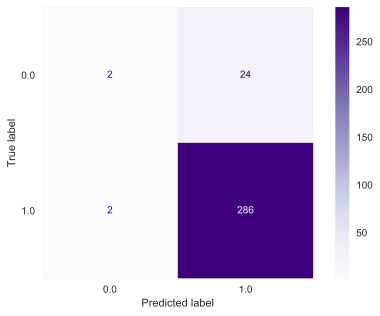

In [103]:
model_evaluation(testDependentVariables_clf, _knc_Model_preds, testData_clf, _knc_Model, plt.cm.Purples)

In [104]:
%%time

def knc_cv(n_neighbors, data, targets, validator):

    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    cval = cross_val_score(estimator, data, targets,
                           cv=validator, scoring='f1_weighted')
    
    return cval.mean()


def optimize_knc(data, targets, validator):

    def knc_crossval(n_neighbors):

        return knc_cv(n_neighbors=int(n_neighbors),
                      data=data,
                      targets=targets,
                      validator=validator)

    optimizer = BayesianOptimization(f=knc_crossval,
                                     pbounds={'n_neighbors': (1, 41)},
                                     random_state=1234,
                                     verbose=2)
    
    optimizer.maximize(n_iter=35)      
    
    print('Final result: {}'.format(optimizer.max))

    
if __name__ == '__main__':
    
    print(Colours.purple('--- Optimizing K-Neighbors Classifier ---\n'))
    optimize_knc(X3, y3, skf)

--- Optimizing K-Neighbors Classifier ---

|   iter    |  target   | n_neig... |
-------------------------------------
|  1        |  0.8678   |  8.661    |
|  2        |  0.8587   |  25.88    |
|  3        |  0.8587   |  18.51    |
|  4        |  0.8587   |  32.41    |
|  5        |  0.8587   |  32.2     |
|  6        |  0.8327   |  1.736    |
|  7        |  0.8605   |  12.41    |
|  8        |  0.8587   |  41.0     |
|  9        |  0.8587   |  37.13    |
|  10       |  0.8587   |  22.17    |
|  11       |  0.865    |  10.01    |
|  12       |  0.8633   |  7.022    |
|  13       |  0.8587   |  15.48    |
|  14       |  0.8653   |  8.251    |
|  15       |  0.8587   |  28.84    |
|  16       |  0.8587   |  34.97    |
|  17       |  0.8662   |  5.37     |
|  18       |  0.8587   |  39.08    |
|  19       |  0.8587   |  24.03    |
|  20       |  0.8587   |  20.31    |
|  21       |  0.859    |  9.239    |
|  22       |  0.8691   |  8.614    |
|  23       |  0.8587   |  32.45    |
|  24  

***
**Comment:** *`GridSearch` и `BayesianOptimization` нашли значения гиперпараметров, при которых максимального accuracy оказались очень похожими.*
***

***
**Comment:** *Сбалансированная точность даже после подбора оптимальных гиперпараметров достаточно низкая. Причина: несбалансированная выборка, большинство студентов сдали предметы.*
***

### 🌌 RadiusNeighbors Classifier <a name="rnclass"></a>

In [105]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [106]:
_rnc_Model = RadiusNeighborsClassifier(p=1)

params = {'radius': np.arange(30, 50),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan', 'chebyshev']}

_clf_Search_RNC = GridSearchCV(_rnc_Model, params, cv=skf, scoring='f1_weighted')

In [107]:
%%time

_clf_Search_RNC.fit(X3, y3)

Wall time: 16.9 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RadiusNeighborsClassifier(p=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'radius': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [108]:
print('Best score for RNC: {}\nParameters for the best score: {}'.format(_clf_Search_RNC.best_score_,
                                                                         _clf_Search_RNC.best_params_))

Best score for RNC: 0.8587304288177073
Parameters for the best score: {'metric': 'euclidean', 'radius': 30, 'weights': 'uniform'}


In [109]:
_rnc_Model = RadiusNeighborsClassifier(**_clf_Search_RNC.best_params_, p=1)
_rnc_Model.fit(trainData_clf, trainDependentVariables_clf)

RadiusNeighborsClassifier(metric='euclidean', p=1, radius=30)

In [110]:
_rnc_Model_preds = _rnc_Model.predict(testData_clf)

Accuracy: 0.9171975
Balanced accuracy: 0.5000000

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.92      1.00      0.96       288

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.84      0.92      0.88       314



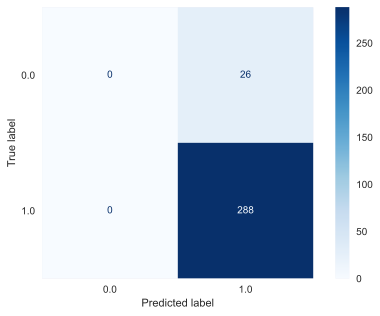

In [111]:
model_evaluation(testDependentVariables_clf, _rnc_Model_preds, testData_clf, _rnc_Model, plt.cm.Blues)

In [112]:
%%time


def rnc_cv(radius, data, targets, validator):

    estimator = RadiusNeighborsClassifier(radius=radius)
    cval = cross_val_score(estimator, data, targets,
                           cv=validator, scoring='f1_weighted')
    
    return cval.mean()


def optimize_rnc(data, targets, validator):

    def rnc_crossval(radius):

        return rnc_cv(radius=float(radius),
                      data=data,
                      targets=targets,
                      validator=validator)

    optimizer = BayesianOptimization(f=rnc_crossval,
                                     pbounds={'radius': (1, 1000000)},
                                     random_state=1234,
                                     verbose=2)
    
    optimizer.maximize(n_iter=35)      
    print('Final result: {}'.format(optimizer.max))

    
if __name__ == "__main__":
    
    print(Colours.blue('--- Optimizing RadiusNeighbors Classifier ---\n'))
    optimize_rnc(X3, y3, skf)

--- Optimizing RadiusNeighbors Classifier ---

|   iter    |  target   |  radius   |
-------------------------------------
|  1        |  0.8587   |  1.915e+0 |
|  2        |  0.8587   |  6.221e+0 |
|  3        |  0.8587   |  4.377e+0 |
|  4        |  0.8587   |  7.854e+0 |
|  5        |  0.8587   |  7.8e+05  |


ValueError: array must not contain infs or NaNs

***
**Comment:** *Сбалансированная точность даже после подбора оптимальных гиперпараметров низкая, модель сработала плохо, отнеся все спрогнозированные значения в один класс. Изменения диапазона подбора радиуса не помогло: модель просто не находила подходящих значений в диапазоне и выдавала ошибку.*
***

### 🧠 Logit Regression <a name="logregr"></a>

In [113]:
from sklearn.linear_model import LogisticRegression

***
**Comment:** *Так как Байесовский оптимизатор показал хорошие результаты подбора числовых гиперпараметров, я сначала посмотрела его и подобрала **`C`** и **`max_iter`**, чтобы **`GridSearchCV`** сработал быстрее.*
***

In [114]:
%%time


def lr_cv(C, max_iter, data, targets, validator):

    estimator = LogisticRegression(C=C, max_iter=max_iter)
    cval = cross_val_score(estimator, data, targets,
                           cv=validator, scoring='f1_weighted')
    
    return cval.mean()


def optimize_lr(data, targets, validator):

    def lr_crossval(C, max_iter):

        return lr_cv(C=float(C),
                     max_iter=int(max_iter),
                     data=data,
                     targets=targets,
                     validator=validator)

    optimizer = BayesianOptimization(f=lr_crossval,
                                     pbounds={'C': (0.1, 5.1),
                                              'max_iter': (50, 1000)},
                                     random_state=1234,
                                     verbose=2)
    
    optimizer.maximize(n_iter=35)      
    print('Final result: {}'.format(optimizer.max))

    
if __name__ == "__main__":
    
    print(Colours.cyan('--- Optimizing Logistic Regression ---\n'))
    optimize_lr(X3, y3, rskf)

--- Optimizing Logistic Regression ---

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
|  1        |  0.874    |  1.058    |  641.0    |
|  2        |  0.8722   |  2.289    |  796.1    |
|  3        |  0.8731   |  4.0      |  309.0    |
|  4        |  0.8729   |  1.482    |  811.8    |
|  5        |  0.8731   |  4.891    |  882.1    |
|  6        |  0.8722   |  3.706    |  630.0    |
|  7        |  0.8724   |  2.025    |  561.8    |
|  8        |  0.8741   |  3.822    |  384.6    |
|  9        |  0.8734   |  1.025    |  656.2    |
|  10       |  0.8738   |  1.018    |  641.1    |
|  11       |  0.8748   |  3.628    |  384.2    |
|  12       |  0.8753   |  3.044    |  383.9    |
|  13       |  0.8744   |  3.149    |  382.8    |
|  14       |  0.8745   |  1.58     |  383.6    |
|  15       |  0.8744   |  1.627    |  639.4    |
|  16       |  0.8722   |  2.698    |  640.1    |
|  17       |  0.8734   |  2.247    |  384.9    |
|  18     

In [115]:
_lr_Model = LogisticRegression()

params = {'C': np.arange(0.1, 2, 0.1),
          'class_weight': [None, 'balanced'],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': np.arange(10, 81, 10)}

_clf_Search_LR = GridSearchCV(_lr_Model, params, cv=rskf, scoring='f1_weighted', n_jobs=-1)

In [116]:
%%time

_clf_Search_LR.fit(X3, y3)

Wall time: 7min 59s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': array([10, 20, 30, 40, 50, 60, 70, 80]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_weighted')

In [117]:
print('Best score for LR: {}\nParameters for the best score: {}'.format(_clf_Search_LR.best_score_,
                                                                        _clf_Search_LR.best_params_))

Best score for LR: 0.8719252652153752
Parameters for the best score: {'C': 1.7000000000000002, 'class_weight': None, 'max_iter': 10, 'solver': 'sag'}


In [118]:
_lr_Model = LogisticRegression(**_clf_Search_LR.best_params_)
_lr_Model.fit(trainData_clf, trainDependentVariables_clf)

LogisticRegression(C=1.7000000000000002, max_iter=10, solver='sag')

In [119]:
np.round(_lr_Model.coef_, 7)

array([[ 1.0585906, -0.2472611,  0.0482878,  0.0694193,  0.1569255,
         0.2033866, -0.4170093, -0.0711217,  0.2200479,  0.117082 ,
        -0.4450067, -0.1679991,  0.3790965, -0.0848226,  0.2242714,
         0.2149527,  0.1386685, -0.2050086, -0.1794529,  0.4400492,
        -0.2284741, -0.1905406,  0.2461962,  0.1061259, -0.1657491,
         0.523549 , -0.2142056,  0.1357454, -0.0888106, -0.0653956,
         0.0437783, -0.0546242,  0.0703462, -0.0926556,  0.0968384,
        -0.0785406]])

In [120]:
_lr_Model_preds = _lr_Model.predict(testData_clf)

Accuracy: 0.9171975
Balanced accuracy: 0.5699786

              precision    recall  f1-score   support

         0.0       0.50      0.15      0.24        26
         1.0       0.93      0.99      0.96       288

    accuracy                           0.92       314
   macro avg       0.71      0.57      0.60       314
weighted avg       0.89      0.92      0.90       314



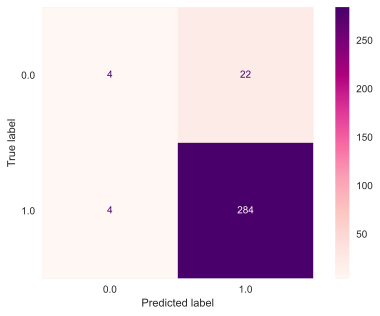

In [121]:
model_evaluation(testDependentVariables_clf, _lr_Model_preds, testData_clf, _lr_Model, plt.cm.RdPu)

In [122]:
prob_preds = _lr_Model.predict_proba(testData_clf)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(testDependentVariables_clf, prob_preds)

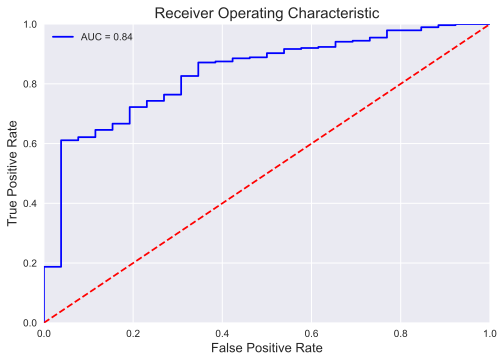

In [123]:
style.use('seaborn')

plt.plot(fpr, tpr, 'b', label = 'AUC = {:.2f}'.format(metrics.auc(fpr, tpr)))
plt.plot([0, 1], [0, 1],'r--')

plt.title('Receiver Operating Characteristic', fontsize=15)
plt.xlabel('False Positive Rate', fontsize = 13)
plt.ylabel('True Positive Rate', fontsize = 13)
plt.legend(loc='upper left')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

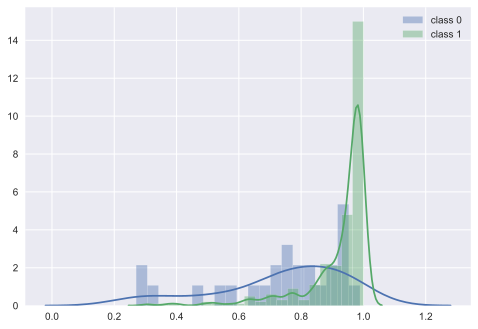

In [124]:
sns.distplot(prob_preds[testDependentVariables_clf == 0],
             bins=20,
             hist=True,
             rug=False,
             label='class 0')

sns.distplot(prob_preds[testDependentVariables_clf == 1],
             bins=20,
             hist=True,
             rug=False,
             label='class 1')

plt.legend()
plt.show()

***
**Comment:** *По **AUC-ROC** видим достаточно большую точность предсказания данных: **0,83**. И сильный перекос в сторону класса **1** по графику **distplot**.*
***

### 🌿 DecisionTree Classifier  <a name="dtclass"></a>

***
**Comment:** *Для дерева решений стандартизировать данные не нужно, поэтому вернёмся к нашей исходной базе данных (кодированной с помощью **`LabelEncoder`** ), предварительно удалив из неё "неинформативные" признаки, которые мы определили в ходе [предобработки](#prepdata) данных. Разобьём её на обучающую и тестовую выборки.*
***

In [125]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [126]:
encoded_data = encoded_data.drop(colnames_to_delete, axis=1)
encoded_data['G3_b'] = _prep_data['G3_b']
encoded_data

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,schoolsup,higher,internet,romantic,goout,Dalc,Walc,health,G1,G3,G3_b
0,1,0,16,1,3,4,3,0,1,1,0,0,1,1,1,1,1.0,4.0,5,15,14,1.0
1,1,0,17,1,3,2,2,0,1,2,0,0,1,1,1,4,1.0,3.0,3,17,17,1.0
2,1,0,16,1,1,2,1,0,2,1,2,0,1,1,1,5,3.0,5.0,5,9,10,1.0
3,1,1,17,1,2,3,2,1,2,2,0,0,1,1,1,3,1.0,1.0,3,14,16,1.0
4,1,0,16,1,1,1,0,1,2,1,0,0,1,0,0,2,1.0,4.0,5,12,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,15,0,3,3,3,3,2,3,2,0,1,1,2,1,2.0,3.0,3,10,10,1.0
1040,1,0,15,0,2,1,1,3,1,2,0,0,1,1,2,2,1.0,1.0,5,10,10,1.0
1041,1,1,16,0,1,1,0,0,3,2,0,0,1,0,1,2,0.0,1.0,1,16,18,1.0
1042,1,0,16,1,2,1,0,0,4,1,0,0,1,0,1,1,1.0,1.0,2,9,11,1.0


In [127]:
(trainData_dtc, 
 testData_dtc, 
 trainDependentVariables_dtc, 
 testDependentVariables_dtc) = train_test_split(encoded_data.drop(['G1', 'G3', 'G3_b'], axis=1),
                                                encoded_data['G3_b'],
                                                test_size=0.3, 
                                                random_state=1234)

In [128]:
X4 = encoded_data.drop(['G1', 'G3', 'G3_b'], axis=1)
y4 = encoded_data['G3_b']

In [129]:
# conda install python-graphviz

In [130]:
import graphviz
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
_dtree_Model = DecisionTreeClassifier(max_depth=5)
_dtree_Model.fit(trainData_dtc, trainDependentVariables_dtc)

In [ ]:
n = 0

for train_index, test_index in kf.split(X4):

    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = y4[train_index], y4[test_index]
        
    _dtree_Model_fit = _dtree_Model.fit(X_train, y_train)
    
    dot_data = export_graphviz(_dtree_Model_fit,
                               out_file=None,
                               feature_names=trainData_dtc.columns,
                               class_names=['0', '1'],
                               filled=True,
                               rounded=True,
                               special_characters=True)
    
    graph = graphviz.Source(dot_data)
    graph.render('dtree_schools_' + str(n))
#     display(graph)
    
    _dtree_Model_preds = _dtree_Model_fit.predict(X_test)
    if n == 0:
        model_evaluation(y_test, _dtree_Model_preds, X_test, _dtree_Model, plt.cm.Greens)
    
    n += 1

In [ ]:
# model_evaluation(testDependentVariables_dtc, _dtree_Model_preds, testData_dtc, _dtree_Model, plt.cm.RdPu)

***
**Comment:** *В начале разбиения первого дерева стоит признак **`failures`** (число провалов студента на предыдущих курсах). Пожалуй, это главный критерий для дальнейшего определения оценки (условно) студента, ведь если человек провалил предмет ранее (условие: число провалов меньше 1.5 для сдачи предмета, gini (качество разбиения) =0.15), вероятность того, что он несерьезно отнесется к учебе в будущем возрастает. 

<br>*Вторыми по значимости на разбиении являются: предмет и возраст. Если возраст меньше 18.5, то на следующем этапе рассматривается вовлеченность в романтические отношения, если старше 18.5 - количество алкоголя, выпитого в течение недели. Рассматривая левую часть дерева, значимыми признаками опять являются: возраст и количество выпитого за неделю алкоголя.*

<br>*Четвертый этап рабиения включает такие признаки, как количество времени, проведенное с друзьями, романтические отношения, школу и время на дорогу до нее, а также количество алкоголя в выходные.*

<br>*И пятое разбиение учитывает намерение студента получать высшее образование, образование родителей и их карьеру, а также уже упоминавшееся количество алкоголя по выходным.*

<br>*Стоит заметить, что к числу провалов модель относит студентов, у которых мамы являются домохозяйками, они сами часто проводят время с друзьями, их возраст меньше 17.5 и обучаются они математике. На мой взгляд, такой "набор" характеристик действительно может характеризовать вероятность провала.*

<br>*Также к числу провалов модель отнесла студентов, у которых образование матери не имеет статуса высшего, у них нет доступа к интернету (а значит и к необходимой для учебы информации), эти студенты старше 17.5 лет и обучаются математике.*

<br>*Похожие правила сформулированы для студентов в зависимости от школы, образования матери, романтических отношений. Отличие их от предыдущей ветки: употребление алкоголя и изучение португальского.*

<br>*Решения самой правой ветки основываются, в основном на критерии употребления алкоголя (примечательно, что для 0 класса по левой стороне количество алкоголя отмечено по-разному, где-то в большом количестве, где-то в малом).*

<br>*Все деревья решений между собой схожи, иногда появляются другие признаки, которые не были удалены при предобработки, но в основном разбиение базируется на характеристиках, описанных выше.*
***

### Многоклассовая классификация  <a name="multclass"></a>
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

***
**Comment:** *Формируем новый признак: насколько хорошо студент сдал предмет (по 4-х бальной шкале).*
***

In [ ]:
m_scores = np.empty(4)
m_scores.fill(2)

h_scores = np.empty(3)
h_scores.fill(3)

_prep_data = _prep_data.assign(G3_m=_prep_data.G3)
_prep_data['G3_m'] = _prep_data['G3_m'].replace(np.arange(21.0).tolist(),
                                                np.zeros(8).tolist() + np.ones(6).tolist() 
                                                + m_scores.tolist() + h_scores.tolist())
_prep_data

In [ ]:
(trainData_mclf,
 testData_mclf, 
 trainDependentVariables_mclf, 
 testDependentVariables_mclf) = train_test_split(_prep_data.drop(['G1', 'G3', 'G3_b', 'G3_m'], axis=1),
                                                 _prep_data['G3_m'],
                                                 test_size=0.3,
                                                 random_state=5)

In [ ]:
X5 = _prep_data.drop(['G1', 'G3', 'G3_b', 'G3_m'], axis=1)
y5 = _prep_data['G3_m']

In [ ]:
def mult_model_evaluation(y_test, y_preds, X_test, search_mod, cmap):
    
    print(
        'Accuracy: {:.7f}\nBalanced accuracy: {:.7f} \
        \nMulticlass f1-score:\
        \n    micro: {:.7f}\
        \n    macro: {:.7f}\
        \n    weighted: {:.7f}'.format(metrics.accuracy_score(y_test, y_preds),
                                       metrics.balanced_accuracy_score(y_test, y_preds),
                                       metrics.f1_score(y_test, y_preds, average='micro'), 
                                       metrics.f1_score(y_test, y_preds, average='macro'),
                                       metrics.f1_score(y_test, y_preds, average='weighted'))
    )
    
    print('\nClassification report:\n')
    print(metrics.classification_report(y_test, y_preds, digits=5))

    style.use('seaborn-darkgrid')
    sns.set_style('dark')

    plot_confusion_matrix(search_mod,
                          X_test,
                          y_test,
                          cmap=cmap,
                          values_format='.5g')
    plt.show()

***
**Comment:** *В многоклассовой классификации я везде использовала Байесовскую оптимизацию гиперпараметров для более быстрой работы кода, однако мне это не помогло...*
***

### 🤖 KNeighbors Classifier <a name="knmultclass"></a>

In [ ]:
%%time
    
if __name__ == '__main__':
    
    print(Colours.purple('--- Optimizing K-Neighbors M-Classifier ---\n'))
    optimize_knc(X5, y5, skf)

In [ ]:
_knc_Model = KNeighborsClassifier(n_neighbors=23, n_jobs=-1)
_knc_Model.fit(trainData_mclf, trainDependentVariables_mclf)

In [ ]:
_knc_Model_preds = _knc_Model.predict(testData_mclf)

In [ ]:
mult_model_evaluation(testDependentVariables_mclf, _knc_Model_preds, testData_mclf, _knc_Model, plt.cm.Purples)

***
**Comment:** *С многоклассовой классификацией **KNN** справился плохо, точность крайне низкая (0,637), сбалансированная точность также на крайне низком уровне (0.3). Классификатор распределил результаты по двум классам, что негативно характеризует качество модели.*
***

### 🌀 RadiusNeighbors Classifier <a name="rncmultlass"></a>

In [ ]:
%%time

if __name__ == "__main__":
    
    print(Colours.blue('--- Optimizing RadiusNeighbors M-Classifier ---\n'))
    optimize_rnc(X5, y5, skf)

In [ ]:
_rnc_Model = RadiusNeighborsClassifier(radius=191520, n_jobs=-1)
_rnc_Model.fit(trainData_mclf, trainDependentVariables_mclf)

In [ ]:
_rnc_Model_preds = _rnc_Model.predict(testData_mclf)

In [ ]:
mult_model_evaluation(testDependentVariables_mclf, _rnc_Model_preds, testData_mclf, _rnc_Model, plt.cm.Blues)

***
**Comment:** *Хуже, чем **KNN** с многоклассовой классификацией справился **RNC**, точность на уровне 0.6, сбалансированная точность также на крайне низком уровне (0.25). Классификатор отнес все значения в первый класс, отрегулировать радиус не получилось: постоянно вылетала ошибка (классификатор в заданной диапазоне не находил подходящих значений).*
***

### 🔎 Logit Regression <a name="logmultregr"></a>

In [ ]:
if __name__ == "__main__":
    
    print(Colours.cyan('--- Optimizing Logistic M-Regression ---\n'))
    optimize_lr(X5, y5, skf)

In [ ]:
_lr_Model = LogisticRegression(C=3.9998790405940174, max_iter=308)
_lr_Model.fit(trainData_mclf, trainDependentVariables_mclf)

In [ ]:
_lr_Model_preds = _lr_Model.predict(testData_mclf)

In [ ]:
mult_model_evaluation(testDependentVariables_mclf, _lr_Model_preds, testData_mclf, _lr_Model, plt.cm.RdPu)

***
**Comment:** *Лучше, чем **KNN** с многоклассовой классификацией справился **LR**, точность чуть больше 0.6, сбалансированная точность также на крайне низком уровне - 0.34, однако лучше, чем у других классификаторов.*
***

### 🌱 DecisionTree Classifier  <a name="dtmultclass"></a>

In [ ]:
encoded_data['G3_m'] = _prep_data['G3_m']

X6 = encoded_data.drop(['G1', 'G3', 'G3_b', 'G3_m'], axis=1)
y6 = encoded_data['G3_m']

In [ ]:
%%time


def dtc_cv(max_depth, min_samples_split, min_samples_leaf, data, targets, validator):

    estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    
    cval = cross_val_score(estimator, data, targets,
                           cv=validator, scoring='f1_weighted')
    
    return cval.mean()


def optimize_dtc(data, targets, validator):

    def dtc_crossval(max_depth, min_samples_split, min_samples_leaf):
        
        return dtc_cv(
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            data=data,
            targets=targets,
            validator=validator
        )

    optimizer = BayesianOptimization(
        f=dtc_crossval,
        pbounds={
            'max_depth': (5, 21),
            'min_samples_split': (2, 31),
            'min_samples_leaf': (1, 16)
        },
        random_state=1234,
        verbose=2
    )
    
    optimizer.maximize(n_iter=45)

    print("Final result:", optimizer.max)

if __name__ == "__main__":

    print(Colours.green("--- Optimizing Decision Tree ---"))
    optimize_dtc(X6, y6, skf)

In [ ]:
m_dict = {}

for m in np.arange(1, 100):
    
    clf_m = []
    
    _dtree_Model = DecisionTreeClassifier(max_depth=m, min_samples_leaf=15, min_samples_split=30)
    
    for train_index, test_index in kf.split(X6):

        X_train, X_test = X6.iloc[train_index], X6.iloc[test_index]
        y_train, y_test = y6[train_index], y6[test_index]
        
        _dtree_Model_fit = _dtree_Model.fit(X_train, y_train)
        
        predictedDependentVariables = _dtree_Model_fit.predict(X_test)
        
        bas = metrics.balanced_accuracy_score(y_test, predictedDependentVariables)
        clf_m.append(bas)
    
    m_dict[m] = np.mean(clf_m)

In [ ]:
x_v = list(m_dict.keys())
y_v = list(m_dict.values())

In [ ]:
style.use('seaborn')

plt.plot(x_v, y_v, linewidth=1.2)

plt.xticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)

plt.xlabel('max_depth', fontproperties='Fira Sans', fontweight='medium', fontstyle='italic', fontsize=13)
plt.ylabel('balanced_accuracy_score', fontproperties='Fira Sans', fontweight='medium', fontstyle='italic', fontsize=13)

plt.show()

***
**Comment:** *К сожалению, невозможно сказать определенно, на каком значении глубины деревьев модель лучше работает, так как на графике наблюдаются несколько пиков в районе **`balanced_accuracy_score`** = 0.34-0.36. Самый высокий расположен при **`max_depth`** = 71.*
***

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.

***
**Comment:** *Ещё раз прошу прощения за то, что не отправила работу вовремя. Код работал около двух часов...*
***